## Problem: Maximal Rectangle
LeetCode: 85

https://leetcode.com/problems/maximal-rectangle/

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

 

Example 1:

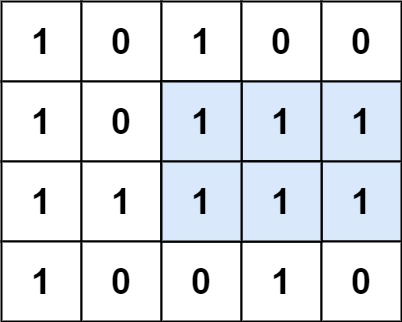

    Input: matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
    Output: 6
    Explanation: The maximal rectangle is shown in the above picture.
Example 2:

    Input: matrix = [["0"]]
    Output: 0
Example 3:

    Input: matrix = [["1"]]
    Output: 1
 

Constraints:

    rows == matrix.length
    cols == matrix[i].length
    1 <= row, cols <= 200
    matrix[i][j] is '0' or '1'.

## Approach

This problem can be sloved as "max reactangle area of histogram". Max area of histogram can be calculated by finding next smaller histogram height in both directions (left and right). Please see the monotonic stack section in coding pattern for more details. We will use the same
technique here. Will assume each row as one histogram and find the max area rectangle. Then will go to next row, here height will change of each column. If colun value is 1, then increase the height, if 0 then set the height = 0.

In [1]:
def maximalRectangle(matrix):
    if len(matrix) == 0:
        return 0
    heights = [0] * len(matrix[0])
    maxArea = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == "1":
                heights[j] += 1
            else:
                heights[j] = 0
        
        leftDist = getPrevMinDist(heights)
        rightDist = getNextMinDist(heights)

        for j in range(len(heights)):
            maxArea = max(maxArea, heights[j] * (rightDist[j] - leftDist[j] +1))
    return maxArea

def getPrevMinDist(heights):
    stack =[]
    left = [0] * len(heights)
    for i in range(len(heights)):
        h = heights[i]
        while stack and h <= stack[-1][0]:
            stack.pop()
        if stack:
            left[i] = stack[-1][1] +1
        else:
            left[i] = 0
        stack.append((h,i))
    return left
def getNextMinDist(heights):
    stack = []
    n = len(heights)
    right = [0] * n
    for i in range(n-1, -1, -1):
        h = heights[i]
        while stack and h <= stack[-1][0]:
            stack.pop()
        if stack:
            right[i] = stack[-1][1] - 1
        else:
            right[i] = n-1
        stack.append((h,i))
    return right

In [3]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
maximalRectangle(matrix)

6